## Problem Definition
Toxic comment classification is a multi-label text classification challenge aimed at identifying various types of toxicity in textual comments. The dataset for this task is imbalanced and includes comments exhibiting different levels of toxicity, such as threats, obscenity, insults, and identity-based hate. The objective of this project is to develop a machine learning model capable of accurately detecting and labeling each type of toxicity present in a given comment.

## Summary
In this notebook, I explore the dataset, clean the comments, and apply various machine learning models to perform toxic comment classification. The steps are as follows:

Programming Language:

Python is used as the programming language for this project.

### 1. Data Exploration and Cleaning
Import Libraries: Import necessary libraries including pandas, numpy, scikit-learn, matplotlib and wordcloud.
Load Dataset: Load and examine the dataset, focusing on the distribution of toxic comments across six different labels.
Data Cleaning and preprocessing: Perform data cleaning by removing HTML tags, punctuation, and stopwords. Tokenize the text to preprocess the data.
Correlation Analysis: Compute correlations between labels to identify any relationships.

### 2. Model Development
Apply different machine learning models to classify the comments into the respective toxicity label categories.

### 3. Data Visualization
To gain further insights into the dataset, I visualized various aspects of the data:
 
 Bar Charts: Plot bar charts to visualize the overall distribution of comments, their lengths and toxic label occurrences.
 Word Clouds: Use word clouds to visualize the most common words in toxic comments to obtain qualitative understanding of the text data.
 ROC-AUC curves

### 4. Model Training
After preprocessing and visualizing the data, I proceeded to train machine learning models for toxic comment classification. I experimented with three different models:

Logistic Regression: This model showed fast training times but lower recall rates.
SVM with Linear Kernel: SVM exhibited higher accuracy but longer training times compared to Logistic Regression. However, it also faced challenges with recall rates.
Random Forest: Random Forest showed competitive performance with higher accuracy but also longer training times compared to Logistic Regression. Like the other two models, it also struggled with recall rates.

### 5. Model Evaluation
Each model was evaluated based on metrics such as accuracy, precision, recall, and F1-score. I also analyzed the performance of the models using metrics like Hamming loss and ROC-AUC curves to assess their ability to handle multi-label classification tasks.

### 6. Conclusion
In this analysis, I used three models for multi-label classification problem where each comment can belong to multiple labels simultaneously: 
Logistic Regression with OneVsRestClassifier, Support Vector Machine (SVM) with a linear kernel, and Random Forest. Logistic Regression proved to be the fastest, completing within 4.402 seconds (0.073 mins) with the accuracy of 92% and hamming loss of 0.0193. Subsequently, Random Forest was trained in 859.193 seconds (14.31 mins) with 91% accuracy and hamming loss of Hamming Loss: 0.0195. In contrast to other two models, SVM method took longest training time which is 2722.874 (45.38 mins) second with 92% accuracy and hamming loss of 0.0187. Despite differences in the training time of trained models, similar accuracy was achieved, ranging between 91-92%. 

However, the selection of the most suitable model can depend on various factors, including precision and recall parameters. For instance if false positives are costly or where precision is of high importance, it is preferable to prioritize precision over recall. Conversely, in situations where missing positive instances is more detrimental or where recall is more critical, prioritizing recall over precision could be the best approach.


In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
!pip install wordcloud #(if not installed)
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, hamming_loss, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [56]:
# load the data
trainSet= pd.read_csv('/mnt/c/Users/vashs/OneDrive/Documents/reckitt/wetransfer_data-7z_2024-06-03_1130/train.csv')
testSet= pd.read_csv('/mnt/c/Users/vashs/OneDrive/Documents/reckitt/wetransfer_data-7z_2024-06-03_1130/test.csv')

# Basic details about the dataset
print("Number of rows in training data =",trainSet.shape[0])
print("Number of columns in training data =",trainSet.shape[1])
print("Number of rows in test data =",testSet.shape[0])
print("Number of columns in test data =",testSet.shape[1])

Number of rows in training data = 159571
Number of columns in training data = 8
Number of rows in test data = 153164
Number of columns in test data = 2


In [7]:
# Display the first few rows of the datasets
print(trainSet.head())
print(testSet.head())

                 id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   insult  identity_hate  threat  toxic  obscene  severe_toxic  
0       0              0       0      0        0             0  
1       0              0       0      0        0             0  
2       0              0       0      0        0             0  
3       0              0       0      0        0             0  
4       0              0       0      0        0             0  
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  ==

In [5]:
# check missing values in the training data
print(trainSet.isnull().sum())

id               0
comment_text     0
insult           0
identity_hate    0
threat           0
toxic            0
obscene          0
severe_toxic     0
dtype: int64


In [9]:
#Function to clean the text data by removing unnecessary characters and formatting
def enhanced_clean_text(text):
    # Split text into sentences
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    cleaned_sentences = []
    for sentence in sentences:
        sentence = sentence.strip() #Remove leading and trailing whitespaces
        sentence = re.sub('<.*?>', '', sentence)# Remove HTML tags
        sentence = re.sub(r'[^\w\s\.\?\:\'\,\-\(\)#]', '', sentence)# Remove punctuation except for 
        #full stops, question marks, colons, apostrophes, commas, hyphens, #, parentheses, and brackets
        sentence = re.sub(r'\s+', ' ', sentence)# Replace multiple spaces with single space
        sentence = re.sub(r'\s*-\s*', '-', sentence)# Remove spaces around hyphens
        # Replace common short forms
        sentence = re.sub(r"\bI'm\b", "I am", sentence)
        sentence = re.sub(r"\bI'd\b", "I would", sentence)
        sentence = re.sub(r"\bI've\b", "I have", sentence)
        sentence = re.sub(r"\bwon't\b", "will not", sentence)
        sentence = re.sub(r"\bwouldn't\b", "would not", sentence)
        sentence = re.sub(r"\bwasn't\b", "was not", sentence)
        sentence = re.sub(r"\bweren't\b", "were not", sentence)
        sentence = re.sub(r"\bdon't\b", "do not", sentence)
        sentence = re.sub(r"\byou'll\b", "you will", sentence)
        cleaned_sentences.append(sentence)
    
    # Join the cleaned text back to a single text
    cleaned_text = ' '.join(cleaned_sentences)
    return cleaned_text.strip()

In [10]:
#  Apply the "enhanced_clean_text" function to the comment_text column of the training set and test set and replace the original column
trainSet['comment_text'] = trainSet['comment_text'].apply(enhanced_clean_text)
testSet['comment_text'] = testSet['comment_text'].apply(enhanced_clean_text)

In [11]:
# Display the cleaned text
print(trainSet.head())
print(testSet.head())

                 id                                       comment_text  \
0  0000997932d777bf  Explanation Why the edits made under my userna...   
1  000103f0d9cfb60f  D'aww He matches this background colour I am s...   
2  000113f07ec002fd  Hey man, I am really not trying to edit war. I...   
3  0001b41b1c6bb37e  More I can't make any real suggestions on impr...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   insult  identity_hate  threat  toxic  obscene  severe_toxic  
0       0              0       0      0        0             0  
1       0              0       0      0        0             0  
2       0              0       0      0        0             0  
3       0              0       0      0        0             0  
4       0              0       0      0        0             0  
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you wi...
1  0000247867823ef7    

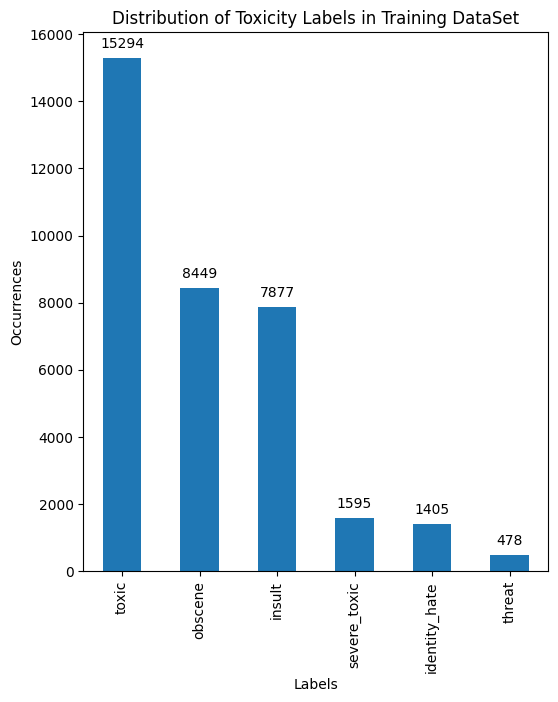

In [66]:
# Visualize the distribution of labels

labels = ['insult', 'identity_hate', 'threat', 'toxic', 'obscene', 'severe_toxic']
label_counts = trainSet[labels].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 7))
ax = label_counts.plot(kind='bar')
plt.title('Distribution of Toxicity Labels in Training DataSet')
plt.xlabel('Labels')
plt.ylabel('Occurrences')

# Add the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Figure 1: Distribution of toxic comments in each label

In [13]:
# Count number of comments per label
df_trainSet= trainSet.drop(['id', 'comment_text'], axis=1)
total = []
for i in labels:
    total.append((i, df_trainSet[i].sum()))
stats = pd.DataFrame(total, columns=['Label', 'Total_comments'])
print(stats)

           Label  Total_comments
0         insult            7877
1  identity_hate            1405
2         threat             478
3          toxic           15294
4        obscene            8449
5   severe_toxic            1595


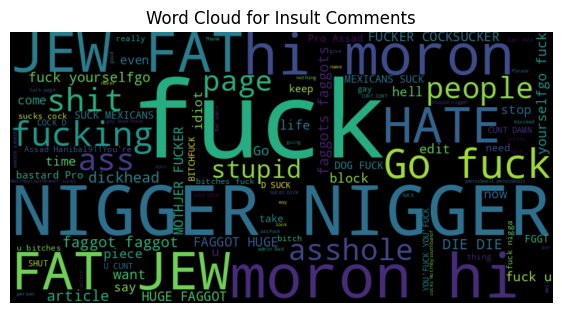

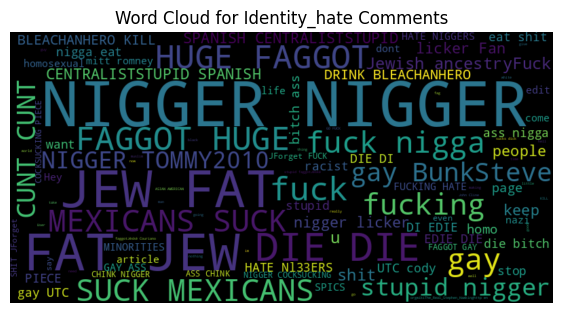

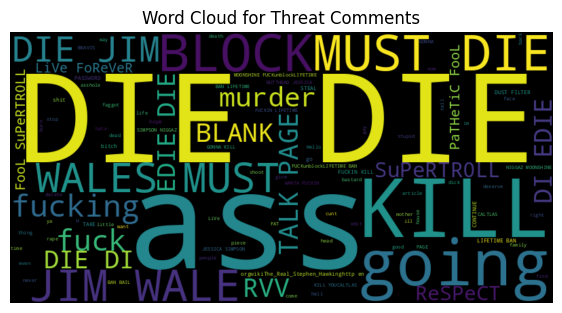

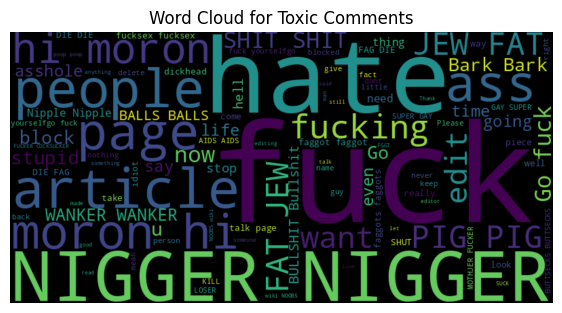

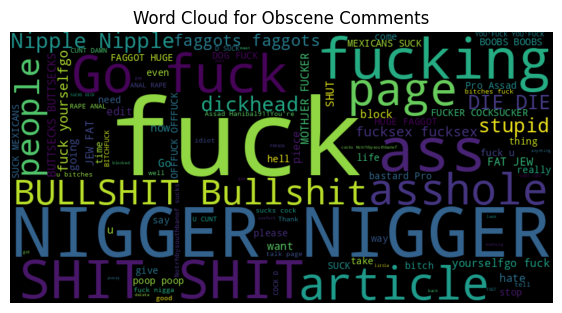

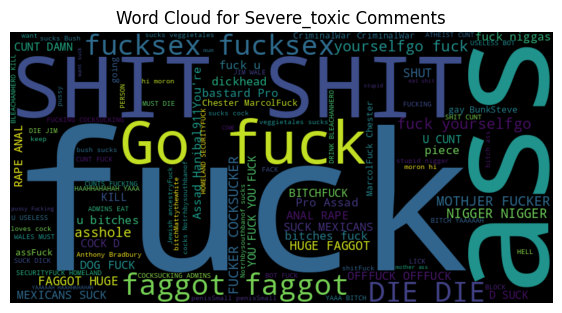

In [15]:
# Add common and overrepresented custom stop words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["know", "think", "like", "would", "one", "use", "make", "also", "get", "see", "wikipedia", "will"])

# Function to build word cloud for each label
def build_wordcloud(label):
    comments = ' '.join(trainSet[trainSet[label] == 1]['comment_text'])
    wordcloud = WordCloud(width=800, height=400, max_words=100, stopwords=custom_stopwords).generate(comments)

    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label.capitalize()} Comments')
    plt.axis('off')
    plt.show()

# Generate word clouds for each label
for label in labels:
    build_wordcloud(label)

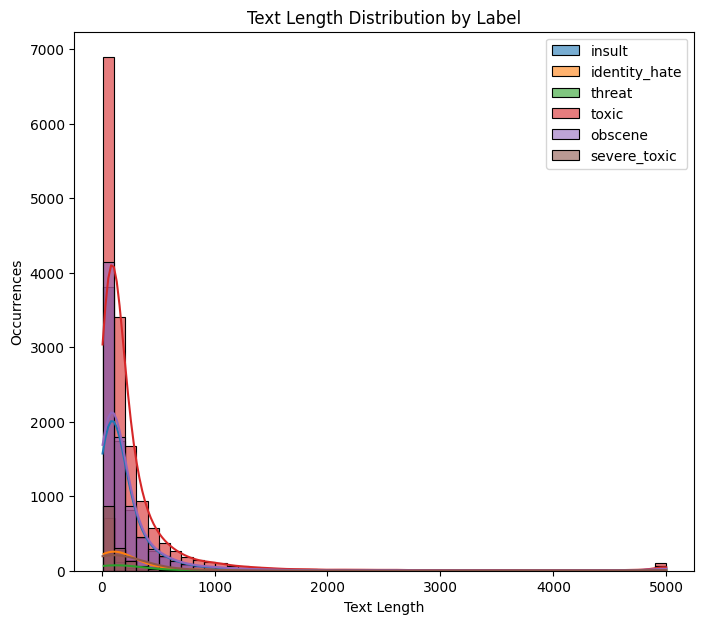

In [101]:
# Calculate text length in given text and visualize the distribution
trainSet['text_length'] = trainSet['comment_text'].apply(len)
plt.figure(figsize=(8, 7))
for label in labels:
    sns.histplot(trainSet[trainSet[label] == 1]['text_length'], bins=50, kde=True, label=label, alpha=0.6)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length')
plt.ylabel('Occurrences')
plt.legend()
plt.show()

## Figure2: Distribution of text length in comments in each label

In [17]:
# Identify the maximum length of text
max_length = trainSet['text_length'].max()
# Explore comments with the maximum length 
longest_comment = trainSet[trainSet['text_length'] == max_length]
print(f"The longest comment is {max_length} characters long.")
print(longest_comment[['comment_text', 'text_length']])

The longest comment is 5000 characters long.
                                             comment_text  text_length
6201    SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SE...         5000
8705    BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALL...         5000
10769   TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TO...         5000
25702   ....would you prefer expressing my frustration...         5000
27148   DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUN...         5000
34422   YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK Y...         5000
35316   MarxismLONG LIVE ANONYMOUS PHILIPPINESLONG LIV...         5000
42061   WANKER WANKER WANKER WANKER WANKER WANKER WANK...         5000
46583   hahahahahahahahahahahahahahahahahaha vandalism...         5000
47715   Block Block Block Block Block Block Block Bloc...         5000
56441   CALTLAS IF YOU CONTINUE TO RVV IT, I WILL BLAN...         5000
57173   Fuck-off-Jewish ancestryFuck-off-Jewish ancest...         5000
70544   delete this pagedelete t

In [88]:
# Function to count comments with multiple label categorization 

def mult_label_dist(dataset, dataset_name):
    
    dataset['label_count'] = dataset[labels].sum(axis=1) # Add a new column with the count of labels per comment
    label_counts = dataset['label_count'].value_counts().sort_index() # Count the number of comments with multiple labels
    
    # Plot distribution
    plt.figure(figsize=(6, 7))
    ax = label_counts.plot(kind='bar')
    plt.title(f'Number of Labels per Comment in {dataset_name} Dataset')
    plt.xlabel('Number of Labels')
    plt.ylabel('Number of Comments')
    plt.xticks(rotation=0)
# display count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

    # Print the number and percentage of comments with multiple labels
    mult_labels_count = dataset[dataset['label_count'] > 1].shape[0]
    total_comments = dataset.shape[0]
    perc_mult_labels = (mult_labels_count / total_comments) * 100
    
    print(f"Number of comments with multiple labels in {dataset_name} set: {mult_labels_count}")
    print(f"Percentage of comments with multiple labels in {dataset_name} set: {perc_mult_labels:.2f}%")

  # Calculate and print also the number and percentage of comments with '0'
    non_toxic_count = dataset[dataset['label_count'] == 0].shape[0]
    total_comments = dataset.shape[0]
    percentage_non_toxic = (non_toxic_count / total_comments) * 100
    
    print(f"Number of non-toxic comments in {dataset_name} set: {non_toxic_count}")
    print(f"Percentage of non-toxic comments in {dataset_name} set: {percentage_non_toxic:.2f}%")

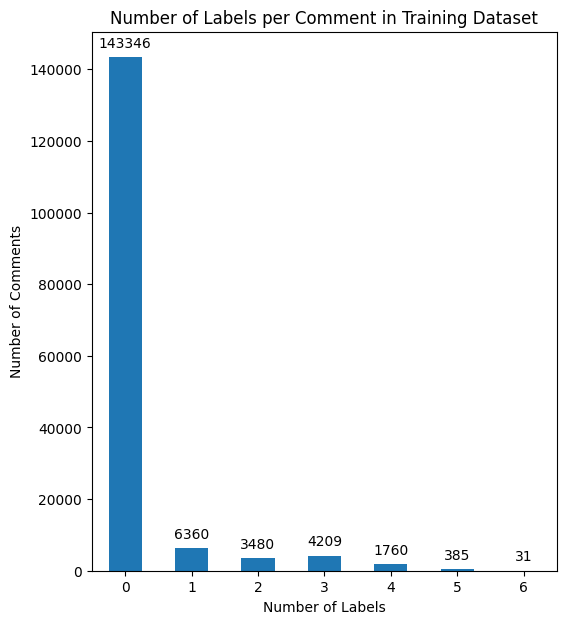

Number of comments with multiple labels in Training set: 9865
Percentage of comments with multiple labels in Training set: 6.18%
Number of non-toxic comments in Training set: 143346
Percentage of non-toxic comments in Training set: 89.83%


In [89]:
mult_label_dist(trainSet, 'Training')

## Figure 3: Distribution of multi-label assignment for comments 

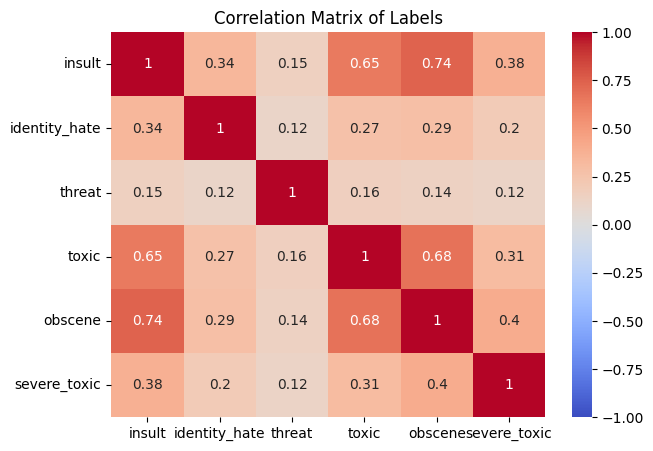

In [20]:
# Calculate the correlation between the labels
corr_matrix = trainSet[labels].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Labels')
plt.show()

## Figure 4: Correlation matrix of labels

In [21]:
trainSet.head()

,id,comment_text,insult,identity_hate,threat,toxic,obscene,severe_toxic,text_length,label_count
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,267,0
1,000103f0d9cfb60f,D'aww He matches this background colour I am s...,0,0,0,0,0,0,111,0
2,000113f07ec002fd,"Hey man, I am really not trying to edit war. I...",0,0,0,0,0,0,234,0
3,0001b41b1c6bb37e,More I can't make any real suggestions on impr...,0,0,0,0,0,0,606,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,0


## Text 'preprocessing' and 'vectorization' : convertion of text into numerical vectors using Term Frequency-Inverse Document Frequency (TF-IDF)

In [22]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(trainSet['comment_text'])
X_test_tfidf = tfidf_vectorizer.transform(testSet['comment_text'])

# Define the target variables from training set labels
y_train = trainSet[labels]

## Split the training data into 'training' and 'validation' subsets
20% of the training data will be used for the validation subset and remaining 80% is used for training the model

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

In [24]:
print(y_train)

        insult  identity_hate  threat  toxic  obscene  severe_toxic
140030       0              0       0      1        0             0
159124       0              0       0      0        0             0
60006        0              0       0      0        0             0
65432        0              0       0      0        0             0
154979       0              0       0      0        0             0
...        ...            ...     ...    ...      ...           ...
119879       0              0       0      0        0             0
103694       0              0       0      0        0             0
131932       0              0       0      1        0             0
146867       0              0       0      0        0             0
121958       0              0       0      0        0             0

[127656 rows x 6 columns]


In [29]:
# Function to measure task execution time
def execution_time(start_time):
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Total execution time: {elapsed_time:.3f} seconds")

## METHOD 1 :: logistic Regression (LR) ::

Total execution time: 4.642 seconds
Accuracy: 0.92
TrainedModel using Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.51      0.63      1614
           1       0.77      0.17      0.28       294
           2       0.71      0.16      0.26        74
           3       0.90      0.61      0.73      3056
           4       0.92      0.64      0.75      1715
           5       0.58      0.26      0.36       321

   micro avg       0.88      0.55      0.68      7074
   macro avg       0.79      0.39      0.50      7074
weighted avg       0.87      0.55      0.67      7074
 samples avg       0.06      0.05      0.05      7074

Hamming Loss: 0.0193


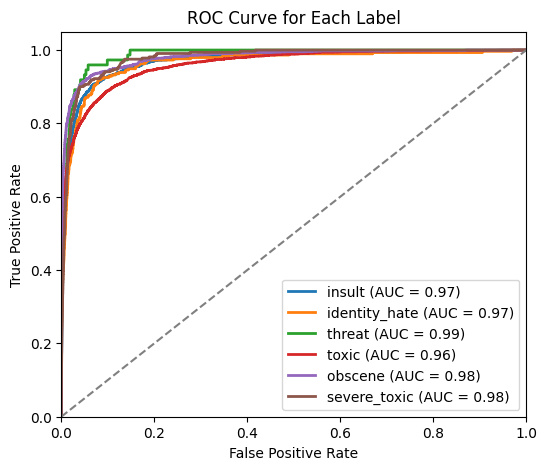

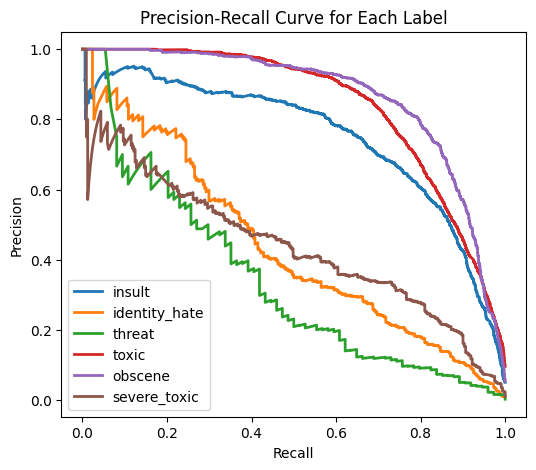

In [100]:
# Define the pipeline
startTime = time.time()
logistic_pipeline = Pipeline([
    ('classifier', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
])

# Train the model using the logistic regression pipeline
logistic_pipeline.fit(X_train, y_train)

# Make predictions 
predictions_lr = logistic_pipeline.predict(X_val)
predictions_prob = logistic_pipeline.predict_proba(X_val)
execution_time(startTime)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, predictions_lr)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report for the validation set
report_trainedModel = classification_report(y_val, predictions_lr, zero_division=0)
print("TrainedModel using Logistic Regression:")
print(report_trainedModel)

## Model evaluation by computing ROC curve and area under curve (AUC) for each label

# Convert y_val and predictions_prob to numpy arrays

y_val_np = y_val.values
predictions_prob_np = predictions_prob

# Calculate Hamming loss to  obtain model's error rate
hamming_loss_value = hamming_loss(y_val_np, predictions_lr)
print(f"Hamming Loss: {hamming_loss_value:.4f}")

fpr = dict() #false positive rate
tpr = dict() #true positive rate
roc_auc = dict()
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_val_np[:, i], predictions_prob_np[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(6, 5))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Label')
plt.legend(loc="lower right")
plt.show()

# Compute precision-recall curve for each label
precision = dict()
recall = dict()
for i in range(len(labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_val_np[:, i], predictions_prob_np[:, i])

# Plot precision-recall curves
plt.figure(figsize=(6, 5))
for i in range(len(labels)):
    plt.plot(recall[i], precision[i], lw=2, label=f'{labels[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Label')
plt.legend(loc="lower left")
plt.show()

## Figure 6 and 7: ROC curve for each label represents the true positive rate against the false positive rate. 
The precision-recall curve showing the proportion of correctly predicted positive instances among all instances predicted as positive.

In [27]:
# Test Datset
print(testSet.head())

                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you wi...
1  0000247867823ef7          From RfC The title is fine as it is, IMO.
2  00013b17ad220c46                     Sources Zawe Ashton on Lapland
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb         I do not anonymously edit articles at all.


## Use the trained LR model to make predictions on the test-dataset

Total execution time: 0.071 seconds


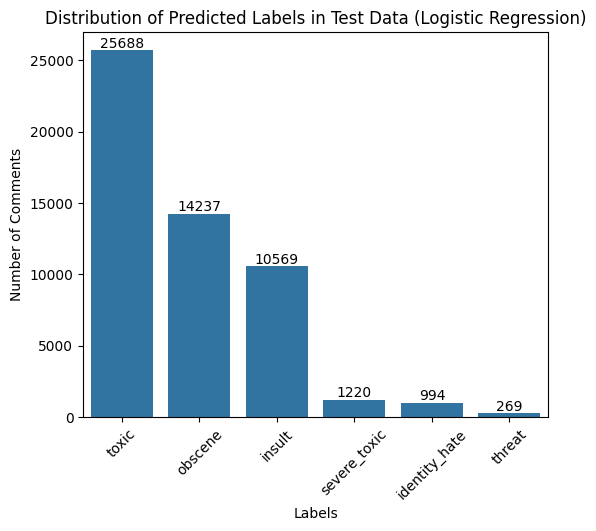

In [90]:
startTime = time.time()
prediction_test = logistic_pipeline.predict(X_test_tfidf)
#print(prediction_test)
predicted_df = pd.DataFrame(prediction_test, columns=labels)
testSet_prediction = pd.concat([testSet, predicted_df], axis=1)
execution_time(startTime)
#print(testSet_prediction.head())
testSet_prediction.to_csv('predictions_LR.csv', index=False)

# Plot the distribution 
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=predicted_df.columns, y=predicted_df.sum().values,order=predicted_df.sum().sort_values(ascending=False).index)
plt.title('Distribution of Predicted Labels in Test Data (Logistic Regression)')
plt.xlabel('Labels')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


### Figure 8: Distribution of predicted labels in test data using Logistic regression Model
This bar chart represents the distribution of predicted labels in the test data for a Logistic Regression model. Each bar represents the count of comments predicted for each label, ordered in descending order.

## Method 2 :: Support Vector Machine (SVM) with linear kernel ::

In [93]:
# Define the pipeline
svm_pipeline = Pipeline([
    ('classifier', OneVsRestClassifier(SVC(kernel='linear')))
])
# Start the timer
startTime = time.time()

# Train the model using the SVM pipeline
svm_pipeline.fit(X_train, y_train)

# Make predictions
predictions_svm = svm_pipeline.predict(X_val)

# Generate the classification report for the validation set
report_svm = classification_report(y_val, predictions_svm, zero_division=0)
print("Trained Model using SVM with Linear Kernel:")
print(report_svm)

Trained Model using SVM with Linear Kernel:
              precision    recall  f1-score   support

           0       0.80      0.55      0.65      1614
           1       0.82      0.12      0.21       294
           2       0.73      0.11      0.19        74
           3       0.89      0.65      0.75      3056
           4       0.90      0.68      0.77      1715
           5       0.80      0.01      0.02       321

   micro avg       0.87      0.58      0.70      7074
   macro avg       0.82      0.35      0.43      7074
weighted avg       0.86      0.58      0.67      7074
 samples avg       0.06      0.05      0.05      7074



In [64]:
# Calculate the total execution time
execution_time(startTime)

Total execution time: 2722.874 seconds


## Use the trained SVM model to make predictions on the test-dataset

In [94]:
startTime = time.time()
prediction_test = svm_pipeline.predict(X_test_tfidf)
predicted_df = pd.DataFrame(prediction_test, columns=labels)
testSet_prediction = pd.concat([testSet, predicted_df], axis=1)
execution_time(startTime)
testSet_prediction.to_csv('predictions_SVM.csv', index=False)

Total execution time: 608.766 seconds


Accuracy: 0.92
Hamming Loss: 0.0187


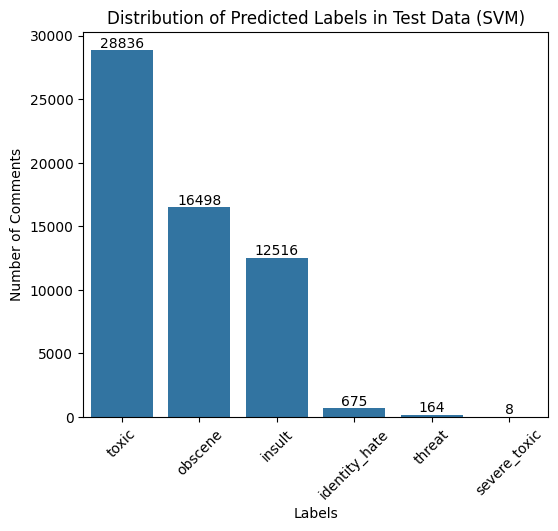

In [99]:
#Compute the accuracy score of the trained model
accuracy = accuracy_score(y_val, predictions_svm)
print(f"Accuracy: {accuracy:.2f}")

# Calculate Hamming loss to evaluate the model accuracy
hamming_loss_value = hamming_loss(y_val, predictions_svm)
print(f"Hamming Loss: {hamming_loss_value:.4f}")

#Plot distribution
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=predicted_df.columns, y=predicted_df.sum().values, order=predicted_df.sum().sort_values(ascending=False).index)
plt.title('Distribution of Predicted Labels in Test Data (SVM)')
plt.xlabel('Labels')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

### Figure 9: Distribution of predicted labels in test data using Support Vector Machine (SVM)
This bar chart represents the distribution of predicted labels in the test data for SVM model. Each bar represents the count of comments predicted for each label, ordered in descending order.

## Method 3 :: Random Forest (RF) ::

In [96]:
startTime = time.time()

# Define the pipeline
rf_pipeline = Pipeline([
    ('classifier', OneVsRestClassifier(RandomForestClassifier(n_estimators=100)))
])

# Train the model using the Random forest pipeline
rf_pipeline.fit(X_train, y_train)

# Make predcitions
predictions_rf = rf_pipeline.predict(X_val)
predictions_prob_rf = rf_pipeline.predict_proba(X_val)

# Compute execution time
execution_time(startTime)

# Compute the accuracy of the trained model
accuracy_rf = accuracy_score(y_val, predictions_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# Get the classification report
report_rf = classification_report(y_val, predictions_rf, zero_division=0)
print("Trained Model using Random Forest:")
print(report_rf)


Total execution time: 859.193 seconds
Accuracy: 0.91%
Trained Model using Random Forest:
              precision    recall  f1-score   support

           0       0.74      0.59      0.66      1614
           1       0.74      0.15      0.24       294
           2       0.64      0.09      0.16        74
           3       0.83      0.68      0.75      3056
           4       0.85      0.73      0.79      1715
           5       0.49      0.07      0.13       321

   micro avg       0.81      0.62      0.70      7074
   macro avg       0.71      0.39      0.46      7074
weighted avg       0.79      0.62      0.68      7074
 samples avg       0.06      0.06      0.06      7074



In [98]:
# compute hamming loss to evaluate the RF model
hamming_loss_value = hamming_loss(y_val, predictions_rf)
print(f"Hamming Loss: {hamming_loss_value:.4f}")

Hamming Loss: 0.0195


## Use the trained Random forest model to make predictions on the test-dataset

Total execution time: 72.290 seconds
                 id                                       comment_text  \
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3  00017563c3f7919a  :If you have a look back at the source, the in...   
4  00017695ad8997eb          I don't anonymously edit articles at all.   

   insult  identity_hate  threat  toxic  obscene  severe_toxic  
0       1              0       0      1        1             0  
1       0              0       0      0        0             0  
2       0              0       0      0        0             0  
3       0              0       0      0        0             0  
4       0              0       0      0        0             0  


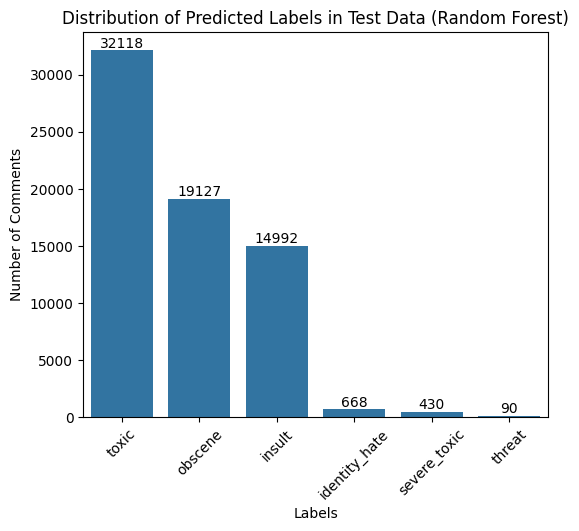

In [97]:
startTime = time.time()
prediction_test_rf = rf_pipeline.predict(X_test_tfidf)
predicted_df_rf = pd.DataFrame(prediction_test_rf, columns=labels)
testSet_prediction_rf = pd.concat([testSet, predicted_df_rf], axis=1)

#compute the execution time on test dataset
execution_time(startTime)

print(testSet_prediction_rf.head())
testSet_prediction_rf.to_csv('predictions_RF.csv', index=False)

# Plot distribution of predicted labels
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=predicted_df_rf.columns, y=predicted_df_rf.sum().values, order=predicted_df_rf.sum().sort_values(ascending=False).index)
plt.title('Distribution of Predicted Labels in Test Data (Random Forest)')
plt.xlabel('Labels')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

### Figure 10: Distribution of predicted labels in test data using Random forest model
This bar chart represents the distribution of predicted labels in the test data for RF model. Each bar represents the count of comments predicted for each label, ordered in descending order.